# INSY5 ML Project1
by Moritz Simet

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import glob

### Import Libraries
We start by importing the required libraries for data manipulation, model training, and evaluation:
- `pandas` for data handling.
- `sklearn` for machine learning models and metrics.
- `numpy` for numerical operations.
- `matplotlib` for potential plotting.
- `glob` for reading multiple files.


In [2]:
# Load JSON files and concatenate into a single DataFrame
json_files = glob.glob('data/spotify/*.json')
dataframe = []
print("Loading data...")
for file in json_files:
    df = pd.read_json(file)
    dataframe.append(df)
print("Data finished loading...")
df = pd.concat(dataframe, ignore_index=True)


Loading data...
Data finished loading...


### Load Data
We load all JSON files from the `data/spotify/` directory into a single DataFrame. The `glob` library helps identify the files, and `pandas` reads and combines them.


In [3]:
# Create time-based features and derived metrics
df['ts'] = pd.to_datetime(df['ts'])
df['year'] = df['ts'].dt.year
df['month'] = df['ts'].dt.month
df['day'] = df['ts'].dt.day
df['hour'] = df['ts'].dt.hour
df['weekday'] = df['ts'].dt.weekday
df["listening_duration"] = df["ms_played"] / 60000

# Create lagged and rolling features
df['prev_duration'] = df['listening_duration'].shift(1)
df['rolling_mean'] = df['listening_duration'].rolling(window=3).mean()

# Create elapsed time in seconds
df['elapsed_seconds'] = (df['ts'] - df['ts'].min()).dt.total_seconds()


### Feature Engineering
We create new features:
1. **Time-based features:** Extract year, month, day, hour, and weekday from timestamps.
2. **Derived metrics:** Calculate listening duration in minutes and add lagged (`prev_duration`) and rolling average (`rolling_mean`) metrics.
3. **Elapsed time:** Calculate the total elapsed time in seconds since the first record.


In [4]:
# Define input (X) and output (y) variables
X = df[['year', 'month', "day", "prev_duration", "rolling_mean", "weekday", 'hour']]
y = df['listening_duration']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Prepare Data for Training
We define the input features (`X`) and target variable (`y`). The data is split into training and testing sets with 80% for training and 20% for testing.


In [5]:
# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


### Train the Model
We use a `RandomForestRegressor` to train the model on the training set and then make predictions on the test set.


In [6]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate additional metrics
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
smape = 100 * np.mean(2 * np.abs(y_test - y_pred) / (np.abs(y_test) + np.abs(y_pred)))
tolerance = 0.1  # 10%
accuracy = np.mean(np.abs(y_test - y_pred) <= tolerance * y_test) * 100

# Print metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"Symmetric MAPE (sMAPE): {smape:.2f}%")
print(f"Custom Accuracy (within 10% tolerance): {accuracy:.2f}%")


Mean Absolute Error (MAE): 0.60
Root Mean Squared Error (RMSE): 1.23
R² Score: 0.59
Mean Absolute Percentage Error (MAPE): inf%
Symmetric MAPE (sMAPE): 57.92%
Custom Accuracy (within 10% tolerance): 30.42%


### Evaluate the Model
We evaluate the model using multiple metrics:
- **Mean Absolute Error (MAE):** Average absolute error between predictions and true values.
- **Root Mean Squared Error (RMSE):** Square root of the mean squared error.
- **R² Score:** Coefficient of determination.
- **Mean Absolute Percentage Error (MAPE):** Percentage-based error measure.
- **Symmetric MAPE (sMAPE):** Adjusted MAPE considering symmetry.
- **Custom Accuracy:** Percentage of predictions within a 10% tolerance.


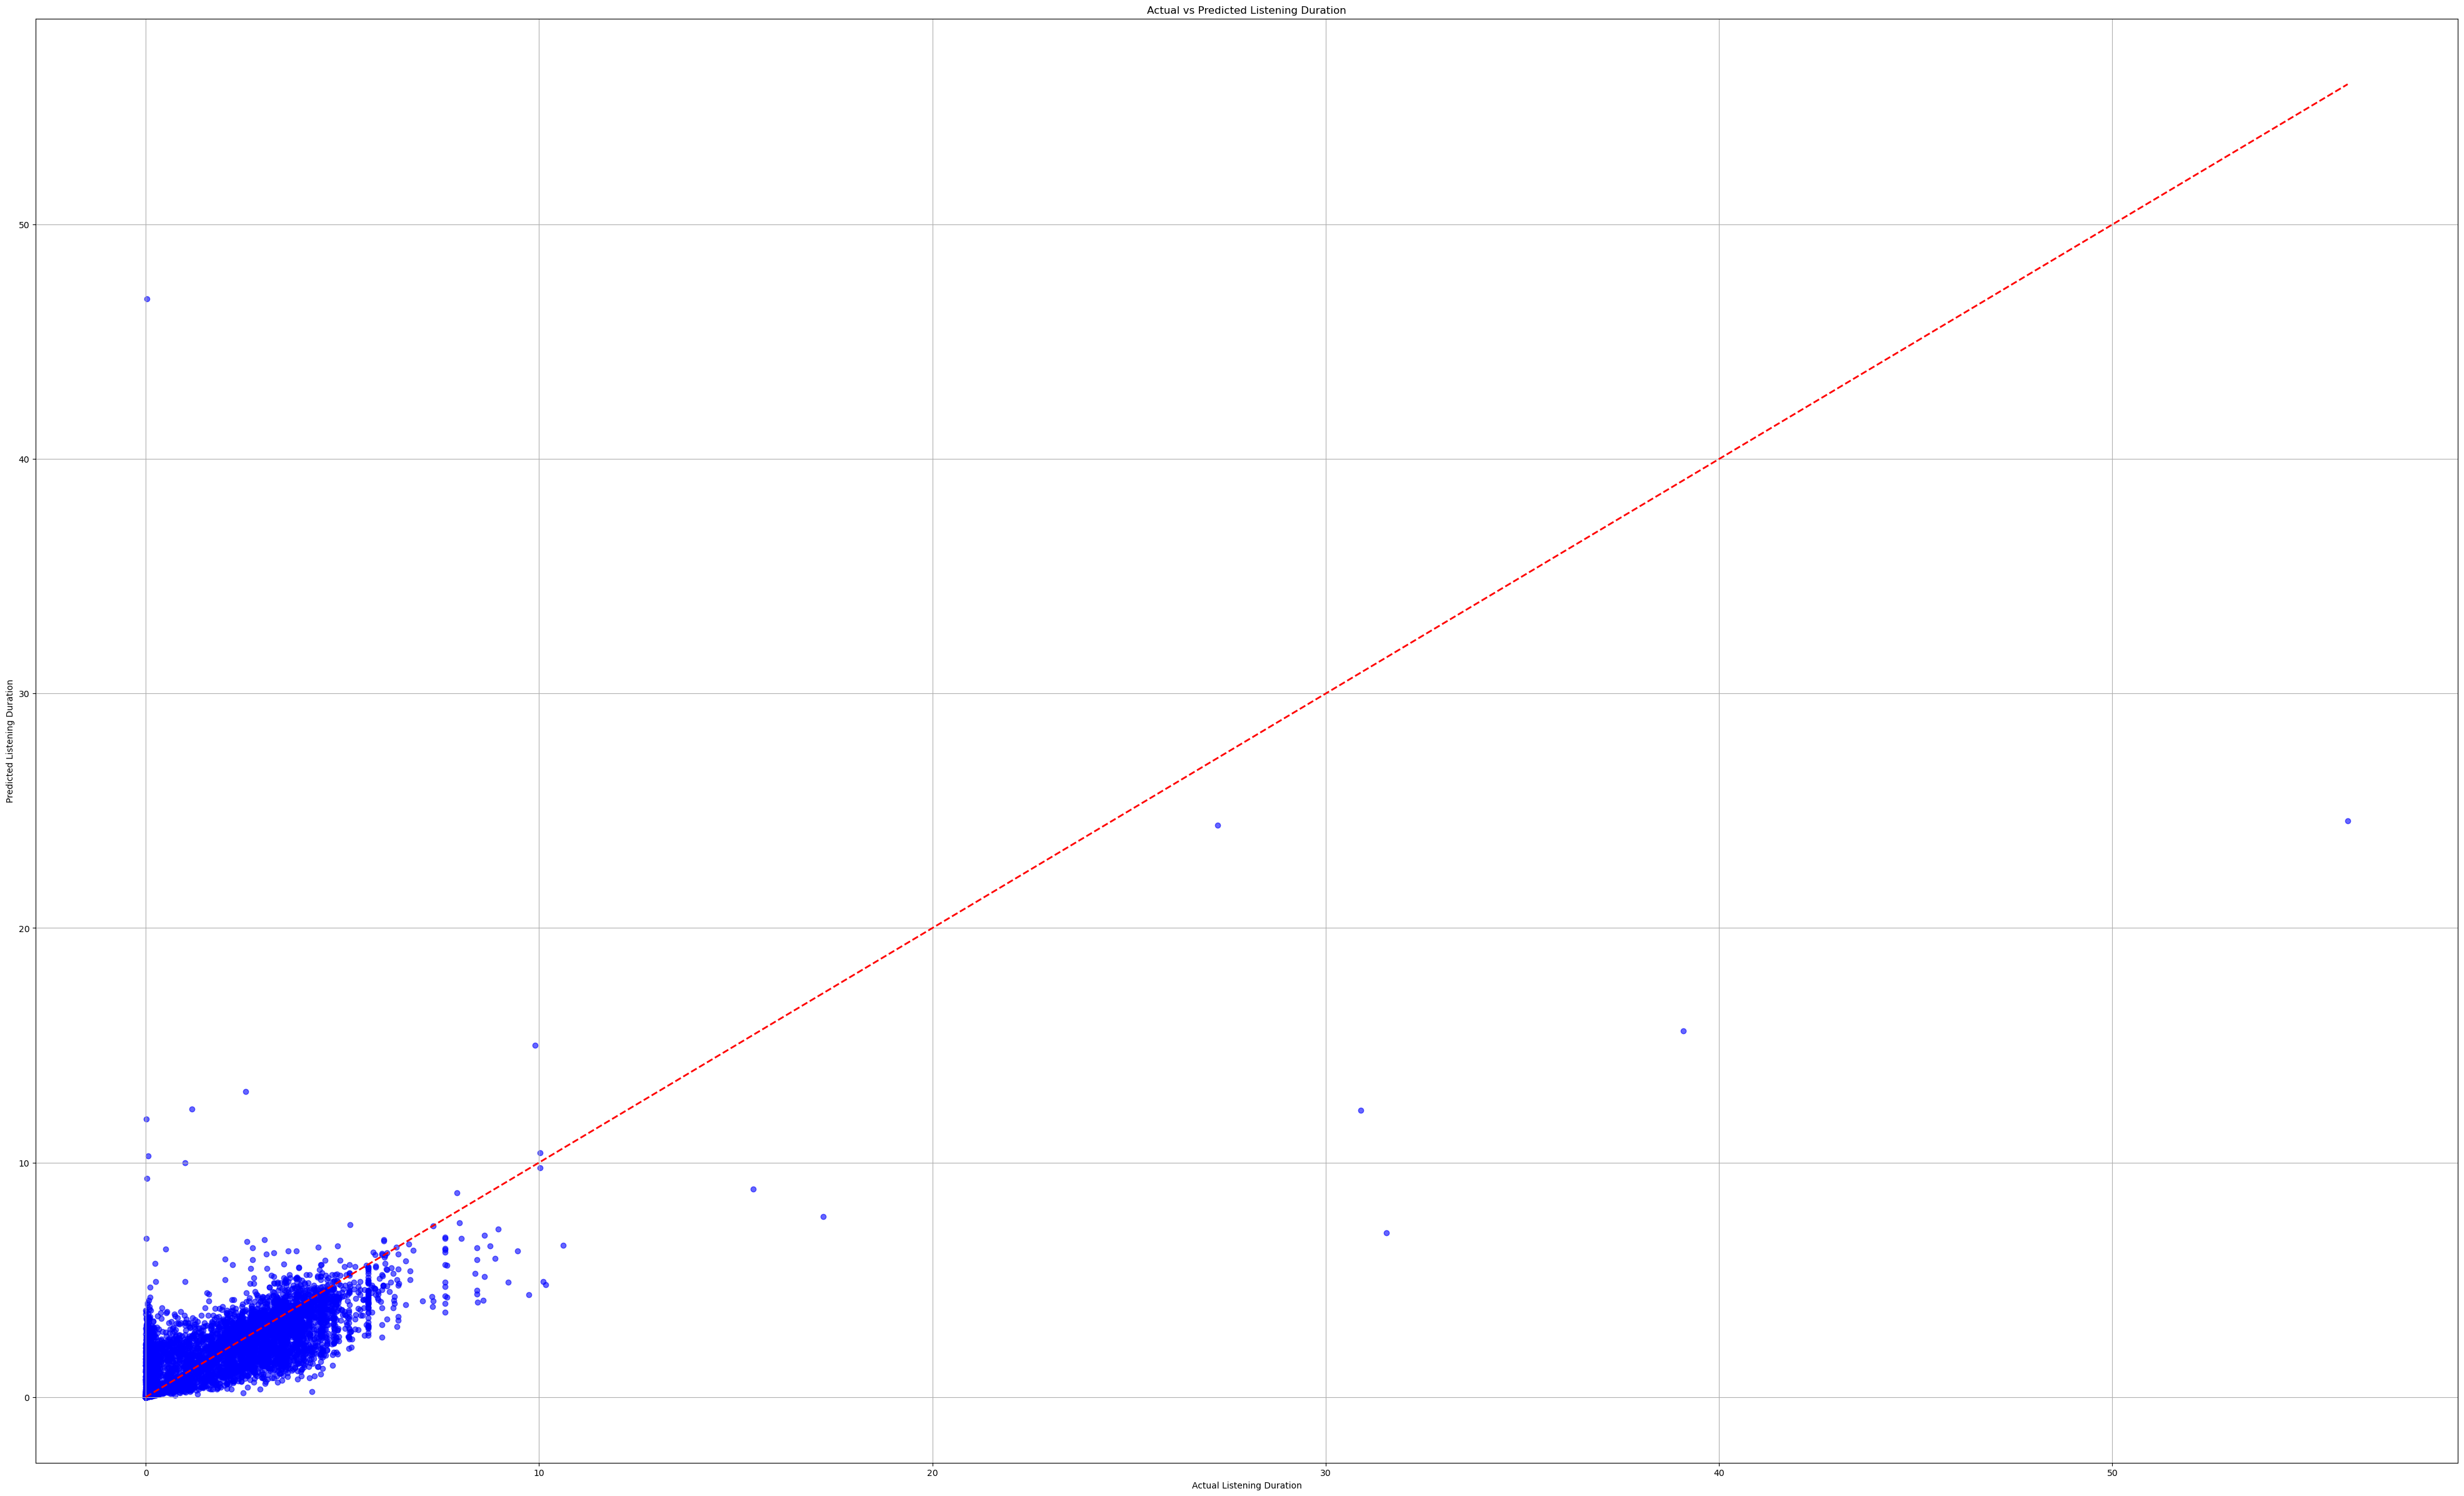

In [17]:
# Plot actual vs predicted values
plt.figure(figsize=(50, 30))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Ideal prediction line
plt.xlabel("Actual Listening Duration")
plt.ylabel("Predicted Listening Duration")
plt.title("Actual vs Predicted Listening Duration")
plt.grid(True)
plt.show()